<a href="https://colab.research.google.com/github/mqquiroz/HUCLAM/blob/main/Vertedero_HUCLAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#Constantes
g     = 9.81
rho   = 1000
gamma = rho*g
nu    = 1e-6

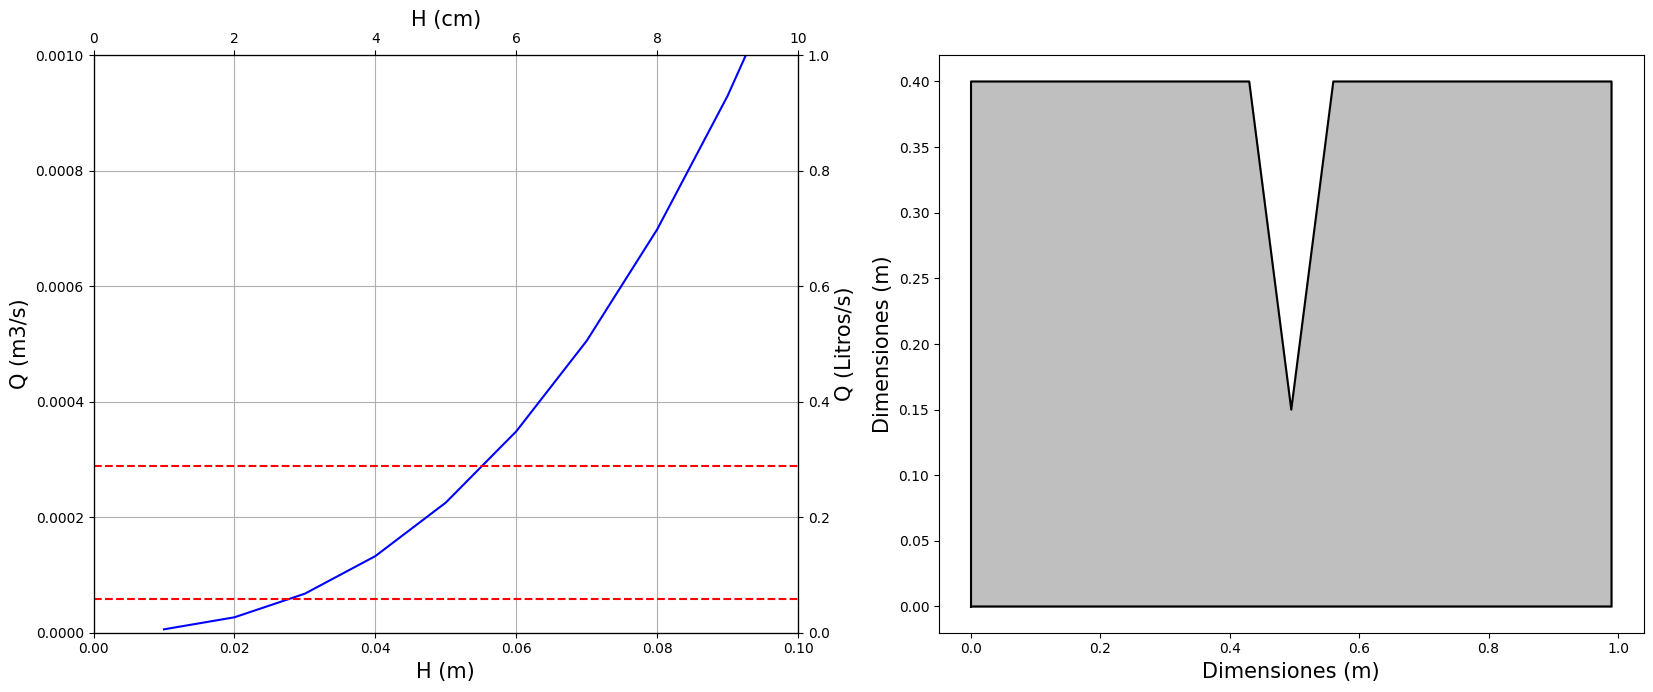

In [29]:
#Cálculo de Vertedero de Pared Delgada. 
#Vertedero de Perfil Triangular
#Ecuación de descarga: Q = m*tan(theta/2)*sqrt(2g)*H^(5/2)
#El coeficiente del gasto es estimado utilizando la reación dada por Hegly (1921)
# m = (0.31 + 0.002/H)

#INPUTS
#angulo de apertura del vertedero
theta = 2*np.arctan(6.5/25)*(180/np.pi) #29.15 #45   #(deg)
#longitud vertical base justo debajo del vertedero
Lv = 0.15 #0.25 #(m)
ancho = 99/100 #(m)
alto  = 40/100 #(m)


#---------------------------------------------------------
Hmin  = 0.01 #(m)
Hmax  = alto-Lv  #(m) 
H = np.arange(Hmin,Hmax+Hmin,Hmin)
m = 0.31 + (0.002/H)

Q = m*np.tan((theta/2)*np.pi/180)*np.sqrt(2*g)*(H**(5/2))

fig, ax = plt.subplots(1,2,figsize=(20,7.5))

ax2 = ax[0].twinx()  
ax2.set_ylim(0,0.001*1000)# np.max(Q)*1000)
ax2.set_ylabel('Q (Litros/s)',fontsize=15)

ax3 = ax[0].twiny()
ax3.set_xlim(0,10)
ax3.set_xlabel('H (cm)',fontsize=15)

ax[0].plot(H,Q,'b')
ax[0].set_xlim(0,Hmax)
ax[0].set_ylim(0,0.001)#np.max(Q))
ax[0].set_xlabel('H (m)',fontsize=15)
ax[0].set_ylabel('Q (m3/s)',fontsize=15)
ax[0].grid()


#Dibujo
x2 = (alto-Lv)*np.tan((theta/2)*np.pi/180)
x = 2*x2

delta = (ancho-(x))/2

x_coords = [0,ancho,ancho,ancho-delta,ancho-delta-x2,delta,   0, 0]
y_coords = [0,    0, alto,       alto,            Lv, alto,alto, 0]

ax[1].plot(x_coords,y_coords,'k')
ax[1].fill_between(x_coords,y_coords, color='grey', alpha=0.5)
ax[1].set_xlabel('Dimensiones (m)',fontsize=15)
ax[1].set_ylabel('Dimensiones (m)',fontsize=15)

ax[0].axhline(y=0.0576/1000, color="red",linestyle="--")
ax[0].axhline(y=0.288/1000, color="red",linestyle="--")

ax[0].set_xlim(0,0.1)

plt.show()